<a href="https://colab.research.google.com/github/anil-iqbal/customer-segmentation/blob/main/Bank_Customer_Marketing_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# You will need to mount your drive using the following commands:
# For more information regarding mounting, please check this out: https://stackoverflow.com/questions/46986398/import-data-into-google-colaboratory

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
creditcard_df = pd.read_csv('/content/drive/My Drive/Customers Segmentation/4.+Marketing_data.csv')

In [ ]:
creditcard_df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [ ]:
creditcard_df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [ ]:
creditcard_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [ ]:
creditcard_df['CASH_ADVANCE'].max()

47137.211760000006

In [ ]:
creditcard_df[creditcard_df['CASH_ADVANCE']== 47137.211760000006]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
2159,C12226,10905.05381,1.0,431.93,133.5,298.43,47137.21176,0.583333,0.25,0.5,1.0,123,21,19600.0,39048.59762,5394.173671,0.0,12


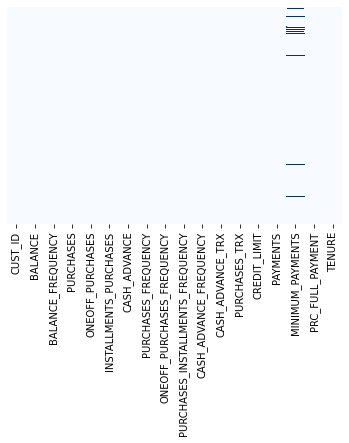

In [ ]:
sns.heatmap(creditcard_df.isnull(), yticklabels=False, cbar=False, cmap='Blues')

In [ ]:
creditcard_df.isnull().sum().sort_values()

CUST_ID                               0
PAYMENTS                              0
PURCHASES_TRX                         0
CASH_ADVANCE_TRX                      0
CASH_ADVANCE_FREQUENCY                0
PURCHASES_INSTALLMENTS_FREQUENCY      0
PRC_FULL_PAYMENT                      0
ONEOFF_PURCHASES_FREQUENCY            0
CASH_ADVANCE                          0
INSTALLMENTS_PURCHASES                0
ONEOFF_PURCHASES                      0
PURCHASES                             0
BALANCE_FREQUENCY                     0
BALANCE                               0
PURCHASES_FREQUENCY                   0
TENURE                                0
CREDIT_LIMIT                          1
MINIMUM_PAYMENTS                    313
dtype: int64

In [ ]:
creditcard_df.loc[(creditcard_df['MINIMUM_PAYMENTS'].isnull() ==True),'MINIMUM_PAYMENTS'] = creditcard_df['MINIMUM_PAYMENTS'].mean()

In [ ]:
creditcard_df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        1
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [ ]:
creditcard_df.loc[(creditcard_df['CREDIT_LIMIT'].isnull()==True), 'CREDIT_LIMIT'] = creditcard_df['CREDIT_LIMIT'].mean()

In [ ]:
creditcard_df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [ ]:
creditcard_df.duplicated().sum()

0

In [ ]:
# Lets drop customer ID since it has no meaning here
creditcard_df.drop(columns = 'CUST_ID', axis=1, inplace=True)

In [ ]:
creditcard_df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.206542,0.000000,6
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [ ]:
creditcard_df.shape

(8950, 17)

In [ ]:
len(creditcard_df.columns)

17

In [ ]:
creditcard_df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

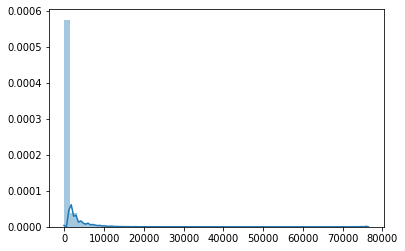

In [ ]:
sns.distplot(creditcard_df)

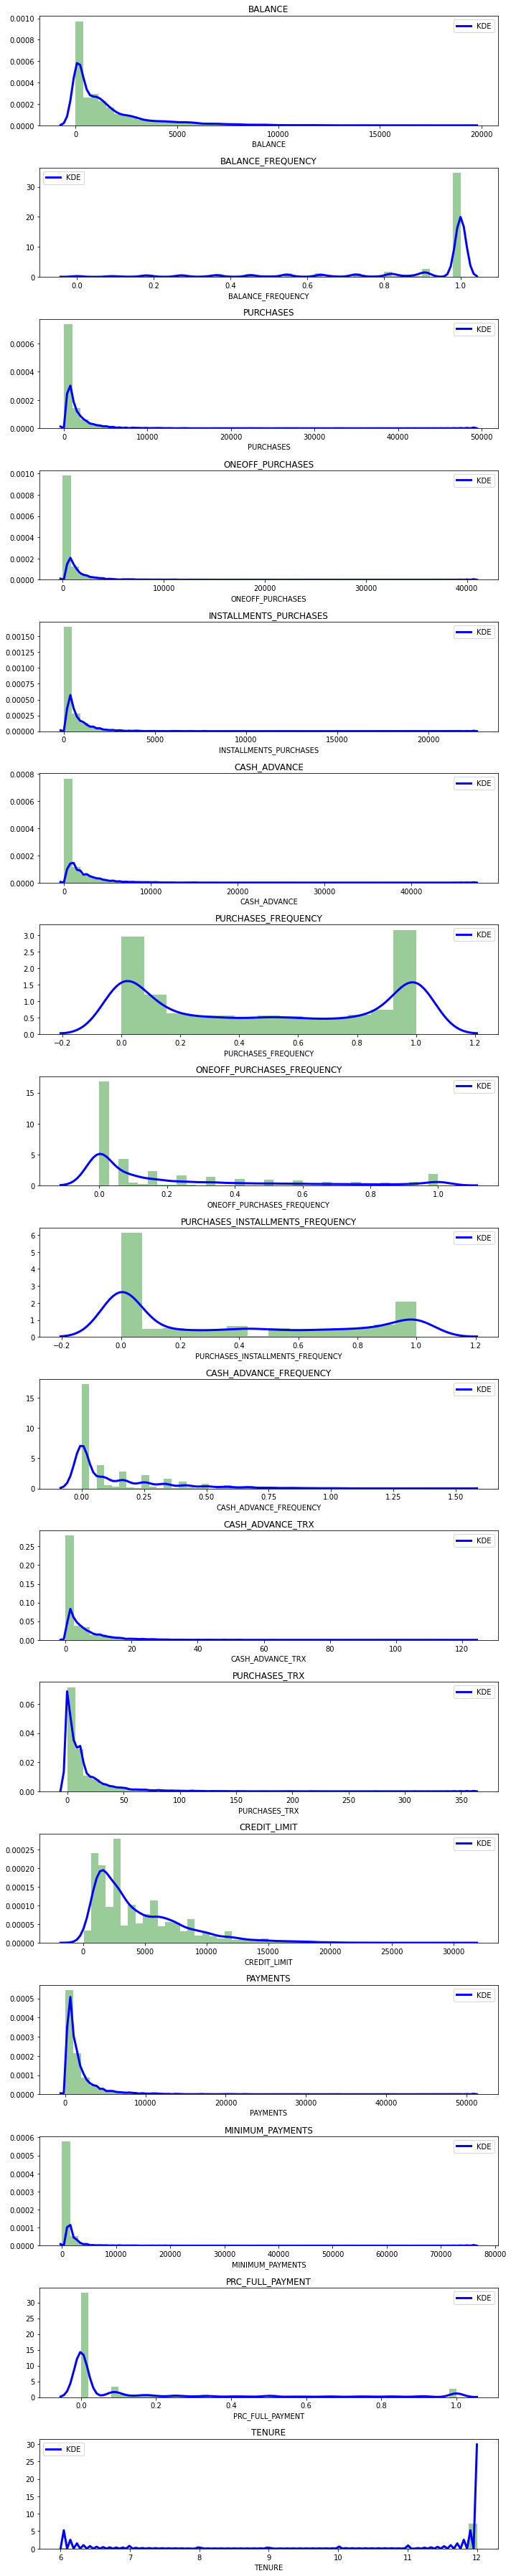

In [ ]:
plt.figure(figsize=(10,50))
for i in range(len(creditcard_df.columns)):
  plt.subplot(17,1, i+1)
  sns.distplot(creditcard_df[creditcard_df.columns[i]],kde_kws={'color':'b', 'lw':3, 'label':'KDE'}, hist_kws={'color':'g'})
  plt.title(creditcard_df.columns[i])

plt.tight_layout()

In [ ]:
correlations = creditcard_df.corr()

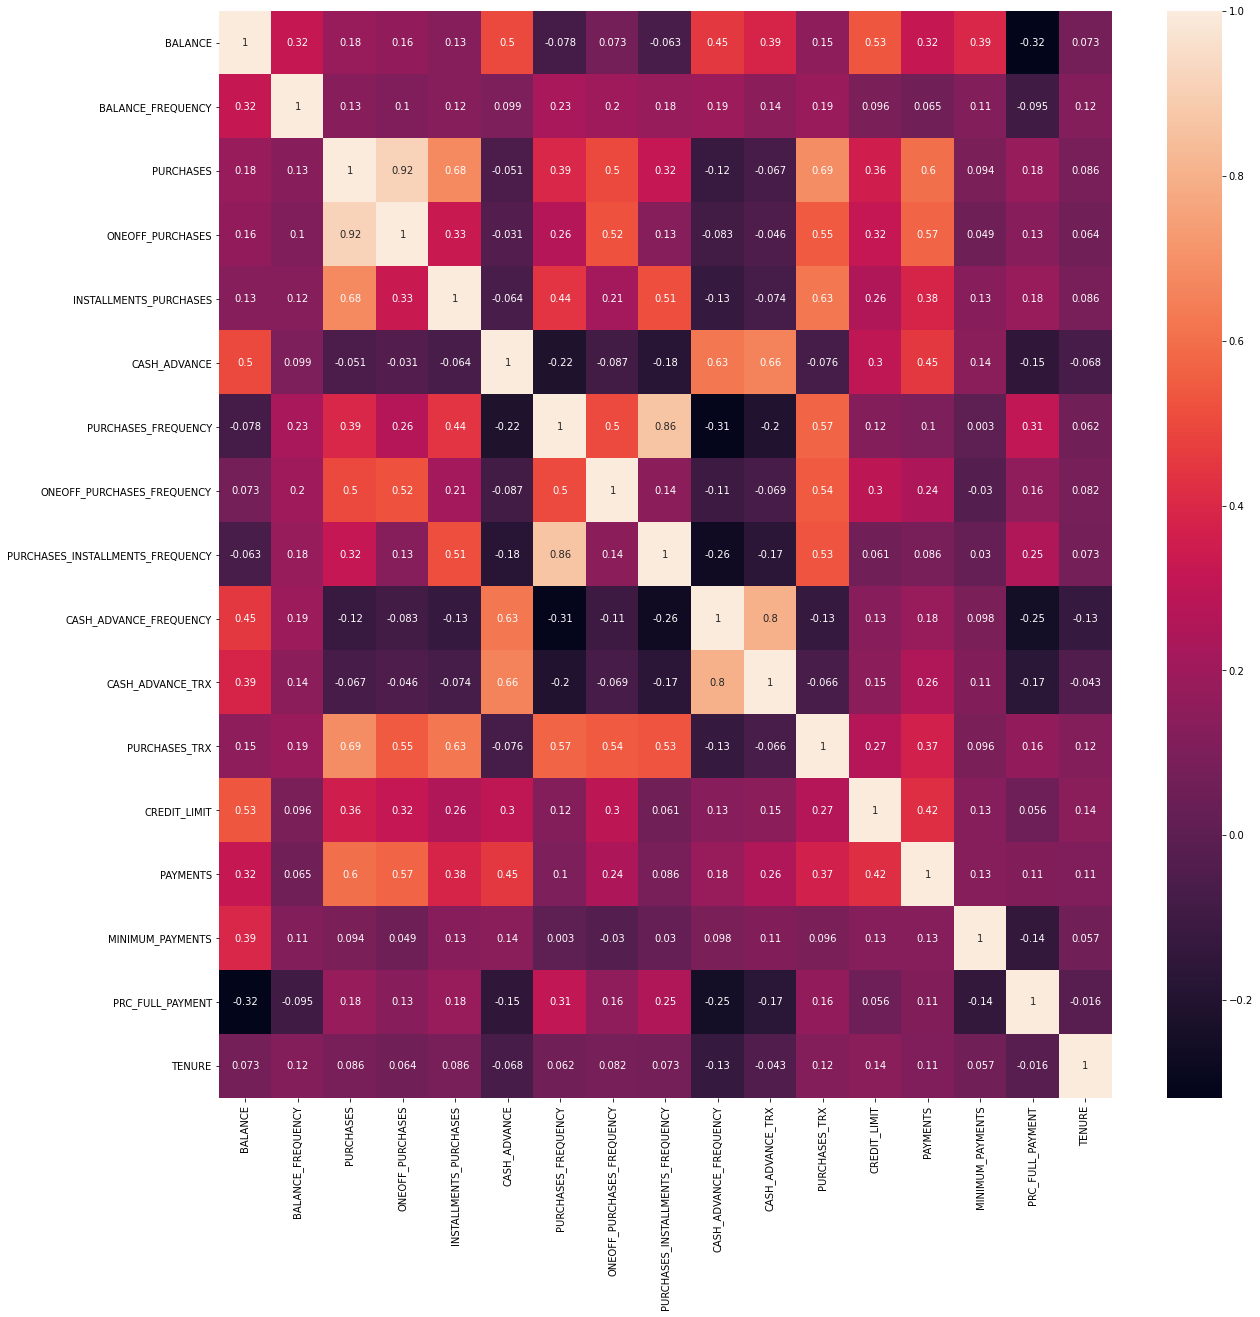

In [ ]:
f,ax = plt.subplots(figsize=(20,20))
sns.heatmap(correlations, annot=True)

In [ ]:
# Lets scale the data first
scaler = StandardScaler()
creditcard_df_scaled = scaler.fit_transform(creditcard_df)

In [ ]:
creditcard_df_scaled.shape

(8950, 17)

In [ ]:
creditcard_df_scaled

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

In [ ]:
scores_1 = []
range_values = range(1,20)
for i in range_values:
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(creditcard_df_scaled)
  scores_1.append(kmeans.inertia_)

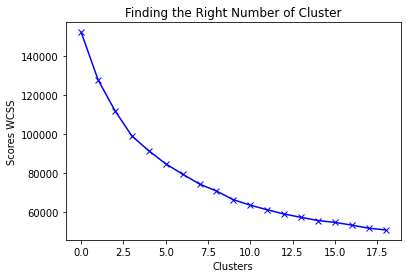

In [ ]:
plt.plot(scores_1, 'bx-')
plt.title('Finding the Right Number of Cluster')
plt.xlabel('Clusters')
plt.ylabel('Scores WCSS')
plt.show()

In [ ]:
kmeans = KMeans(8)
kmeans.fit(creditcard_df_scaled)
labels = kmeans.labels_

In [ ]:
labels

array([5, 1, 6, ..., 7, 7, 7], dtype=int32)

In [ ]:
kmeans.cluster_centers_.shape

(8, 17)

In [ ]:
cluster_centers = pd.DataFrame(data=kmeans.cluster_centers_, columns = [creditcard_df.columns])

In [ ]:
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.701222,-2.139409,-0.310833,-0.235565,-0.302072,-0.322522,-0.555428,-0.443021,-0.439828,-0.521634,-0.376396,-0.419502,-0.177998,-0.202299,-0.257071,0.280448,0.202001
1,1.707257,0.392539,-0.214685,-0.154034,-0.224701,2.045349,-0.470500,-0.209611,-0.408051,1.938425,1.962966,-0.262441,1.041672,0.837310,0.521357,-0.390790,0.067782
2,-0.366314,0.333522,-0.039581,-0.244780,0.355929,-0.364780,0.988573,-0.387904,1.204013,-0.475965,-0.361895,0.185597,-0.261737,-0.219139,-0.046168,0.312466,0.257586
3,0.934901,0.467049,2.252953,1.707412,2.190297,-0.192704,1.160751,1.548096,1.257221,-0.310075,-0.208712,2.800594,1.235324,1.282259,0.575854,0.273318,0.333736
4,1.923051,0.337717,11.212042,10.600367,7.033118,0.419625,1.046983,1.915501,0.981334,-0.258912,0.061229,5.362438,3.044064,8.098975,1.120318,1.110132,0.310863
5,0.024629,0.404291,-0.361623,-0.246729,-0.401656,-0.081229,-0.867983,-0.410029,-0.759594,0.120812,-0.016502,-0.486717,-0.299620,-0.245845,-0.002814,-0.456156,0.271481
6,-0.165621,0.393101,0.473233,0.616950,-0.014643,-0.333808,0.946448,1.881880,0.092228,-0.408068,-0.324367,0.532971,0.381060,0.100656,-0.162835,0.416329,0.262714
7,-0.336717,-0.351618,-0.289556,-0.216192,-0.287105,0.068131,-0.204713,-0.289287,-0.225660,0.308086,0.000466,-0.388444,-0.566467,-0.392990,-0.208809,0.013145,-3.202809


In [ ]:
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data= cluster_centers, columns = [creditcard_df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,104.939796,0.370465,339.104814,201.448528,137.907386,302.527006,0.267430,0.070296,0.189639,0.030760,0.680203,4.282572,3846.818481,1147.508187,265.114438,0.235741,11.787648
1,5117.986411,0.970260,544.526541,336.772834,207.873743,5268.064382,0.301516,0.139927,0.202267,0.523043,16.644628,8.186541,8284.479983,4157.075557,2079.208200,0.039415,11.608028
2,802.023378,0.956279,918.639543,186.152834,732.930025,213.911367,0.887113,0.086738,0.842943,0.039899,0.779156,19.323077,3542.144021,1098.758035,756.613473,0.245106,11.862035
3,3510.393168,0.987910,5816.674519,3426.390962,2391.725865,574.762188,0.956216,0.664285,0.864089,0.073095,1.824519,84.322115,8989.062500,5445.158665,2206.210364,0.233656,11.963942
4,5567.142164,0.957273,24957.905000,18186.875667,6771.029333,1858.844605,0.910556,0.773889,0.754444,0.083333,3.666667,148.000000,15570.000000,25178.882690,3475.059479,0.478409,11.933333
5,1615.737729,0.973044,230.590996,182.916964,47.855240,808.529308,0.141987,0.080138,0.062555,0.159320,3.136214,2.611864,3404.308556,1021.447861,857.649044,0.020297,11.880630
6,1219.748420,0.970393,2014.274792,1616.448752,397.826040,278.861158,0.870206,0.763859,0.401091,0.053486,1.035262,27.957505,5880.901693,2024.533974,484.726340,0.275484,11.868897
7,863.627544,0.793976,384.563451,233.602408,151.442584,1121.745122,0.408189,0.116158,0.274754,0.196795,3.252006,5.054575,2433.410031,595.475430,377.585275,0.157559,7.231140


In [ ]:
labels.shape

(8950,)

In [ ]:
labels.max()

7

In [ ]:
labels.min()

0

In [ ]:
# Concatenate the clusters labels to our original dataframe
creditcard_df_cluster = pd.concat([creditcard_df, pd.DataFrame({'cluster':labels})], axis=1)
creditcard_df_cluster.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,5
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,1
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,6
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,5
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,5


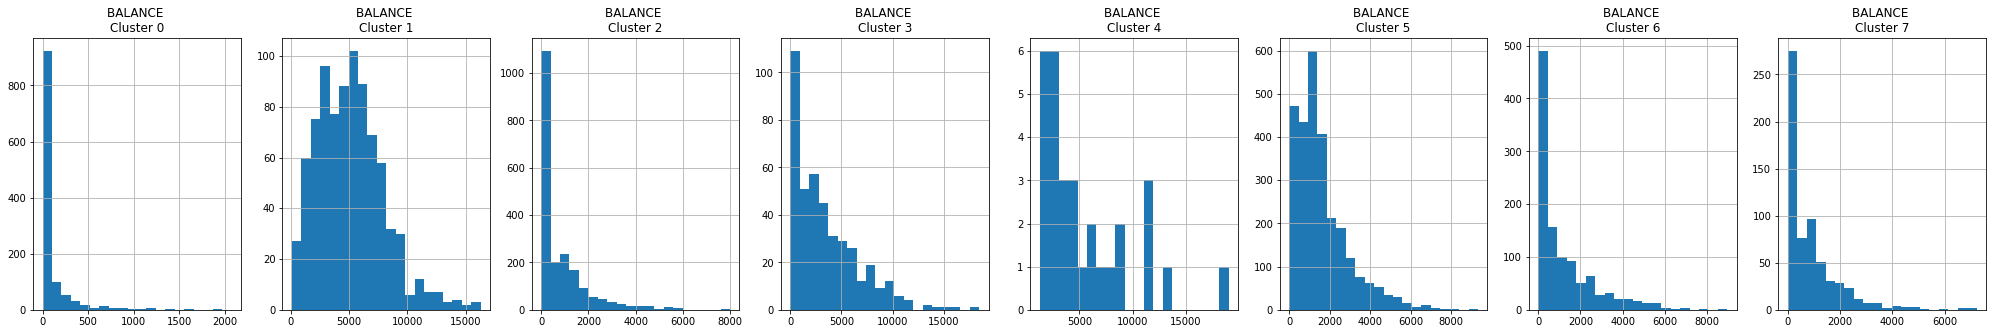

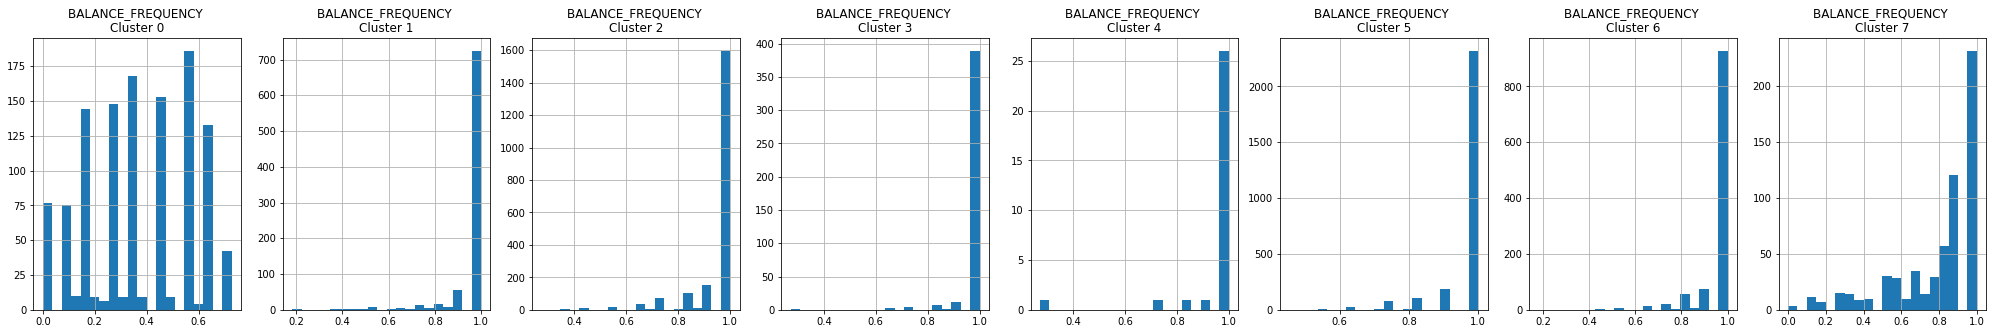

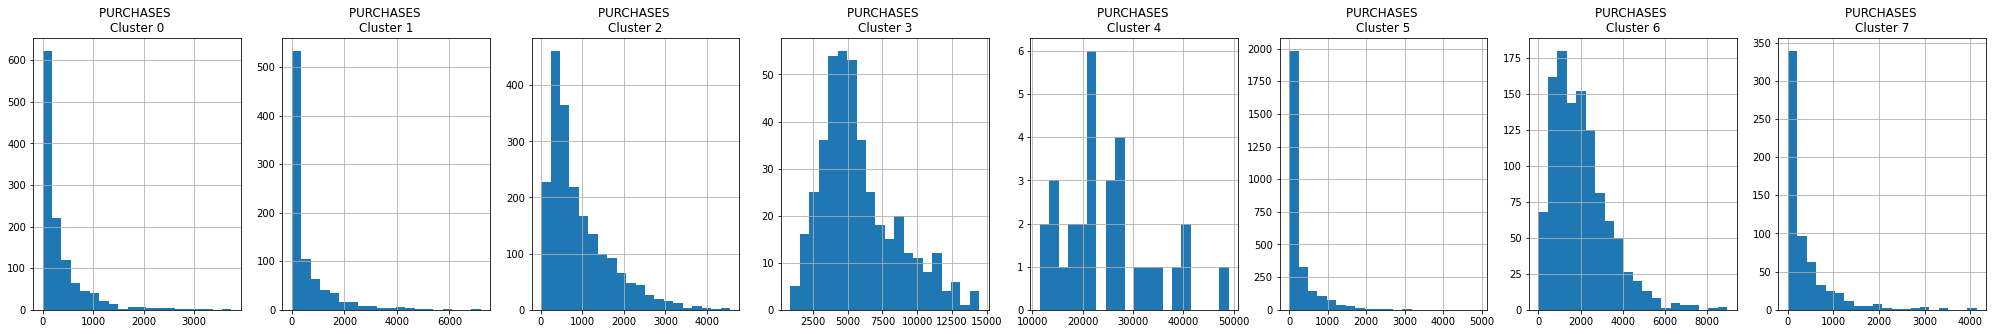

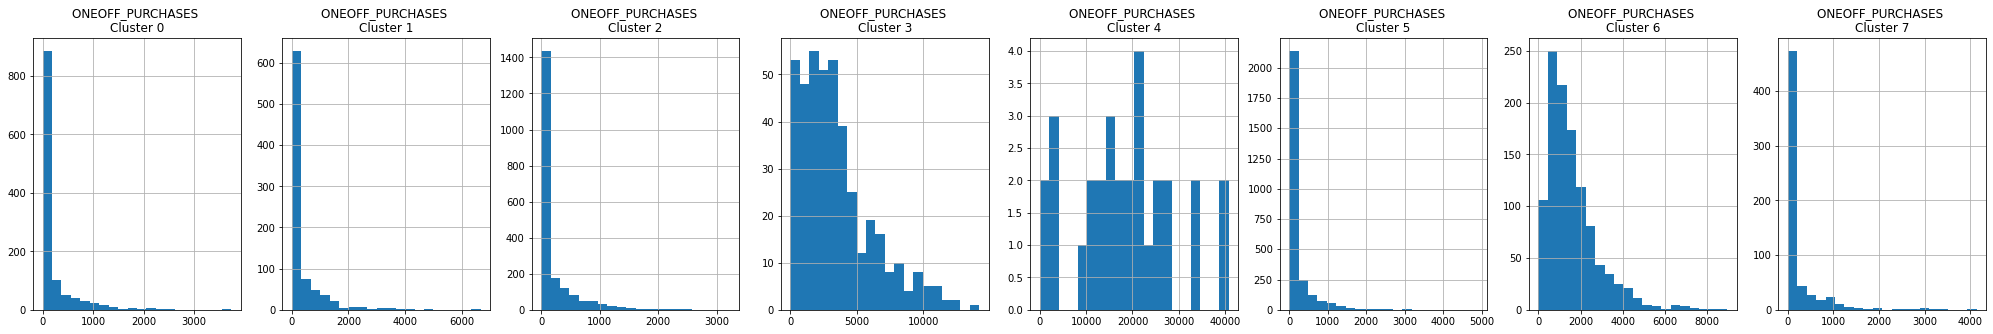

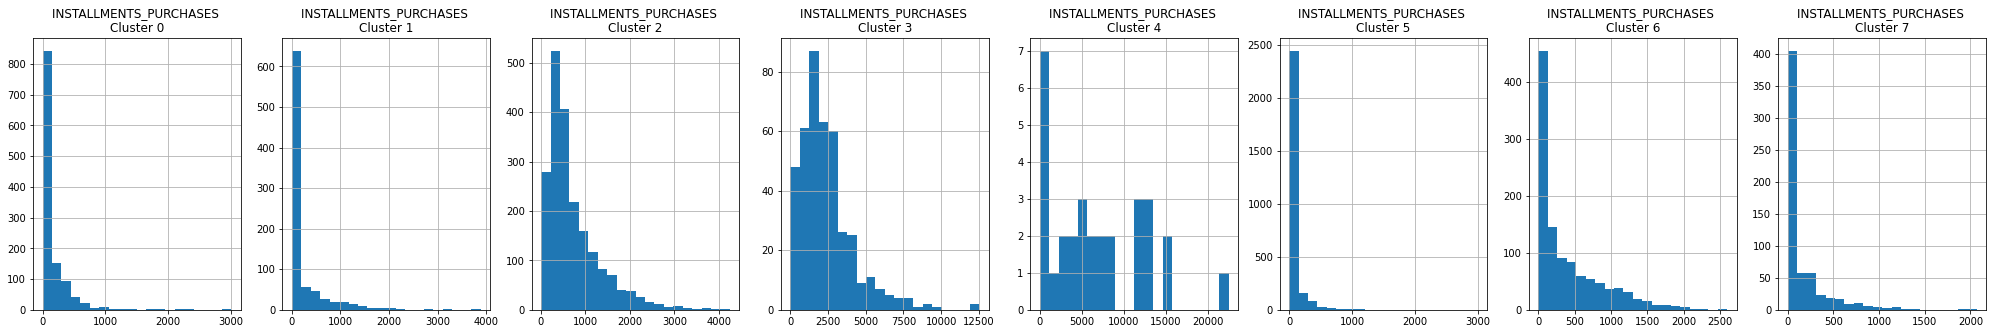

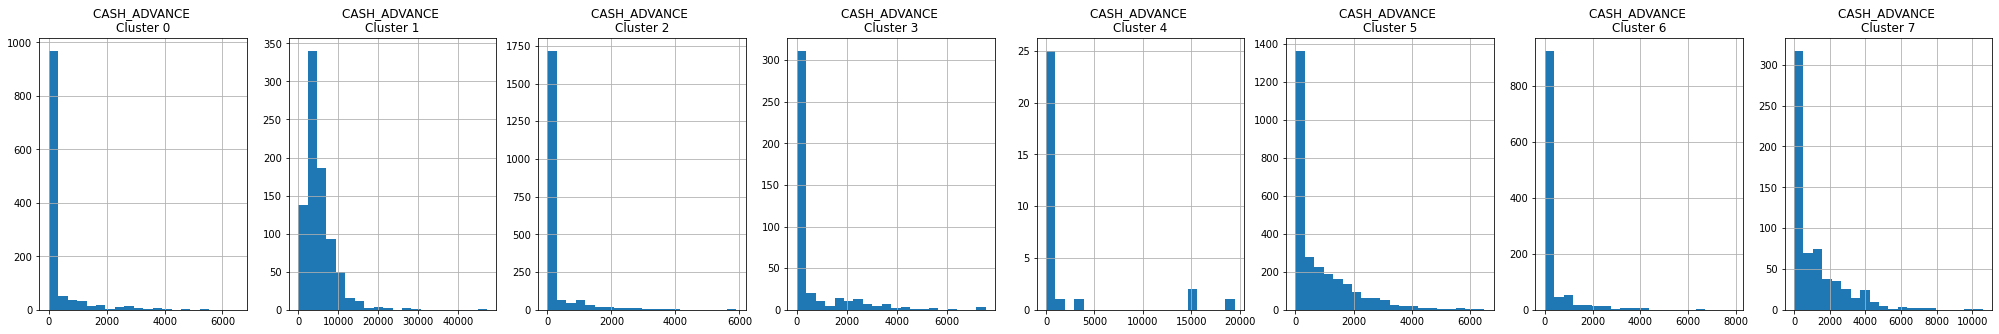

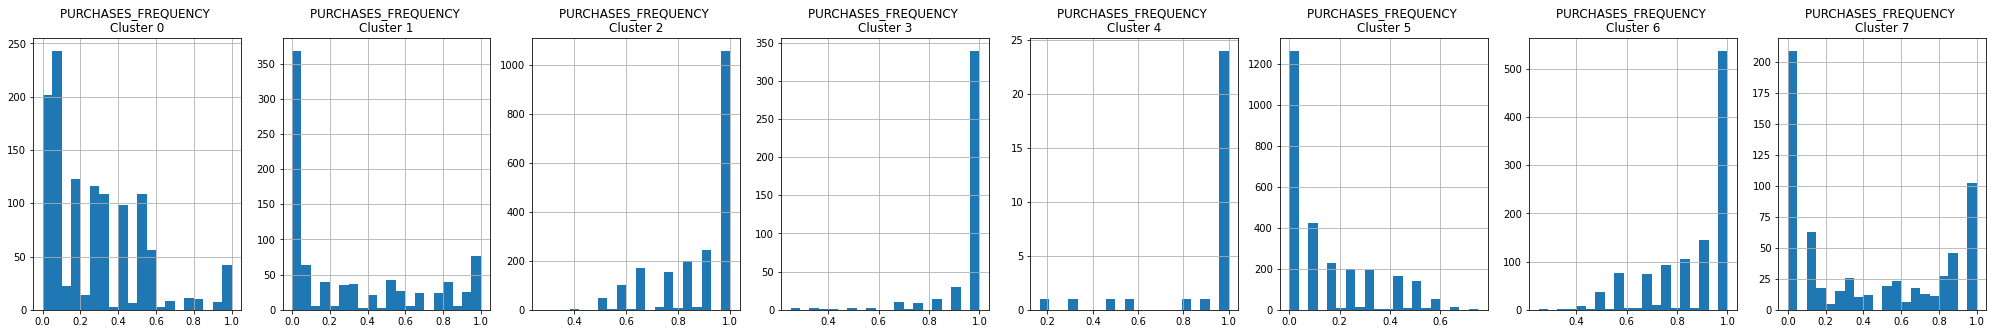

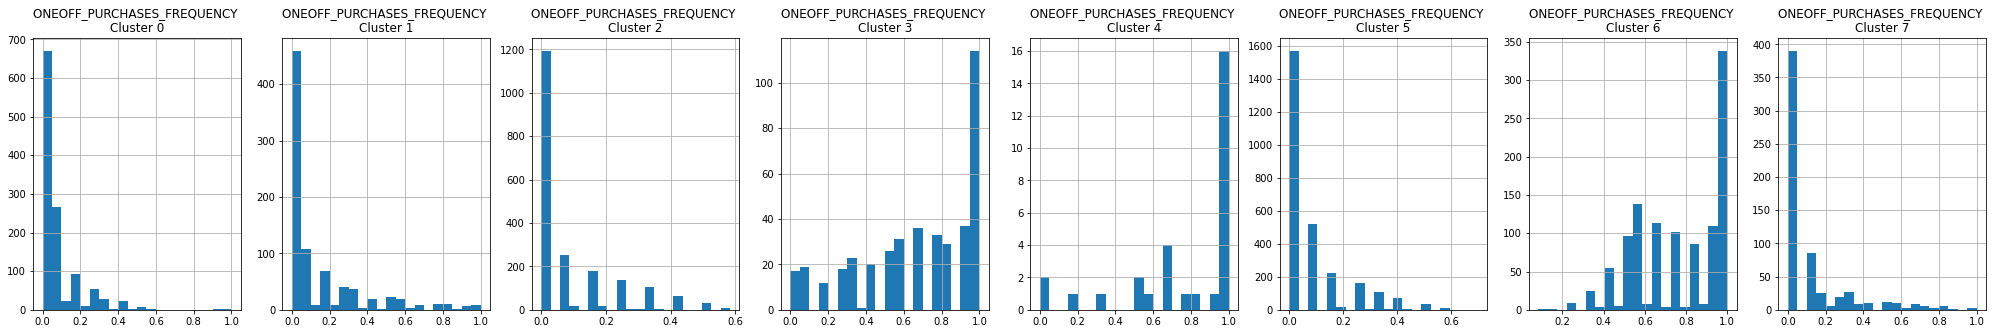

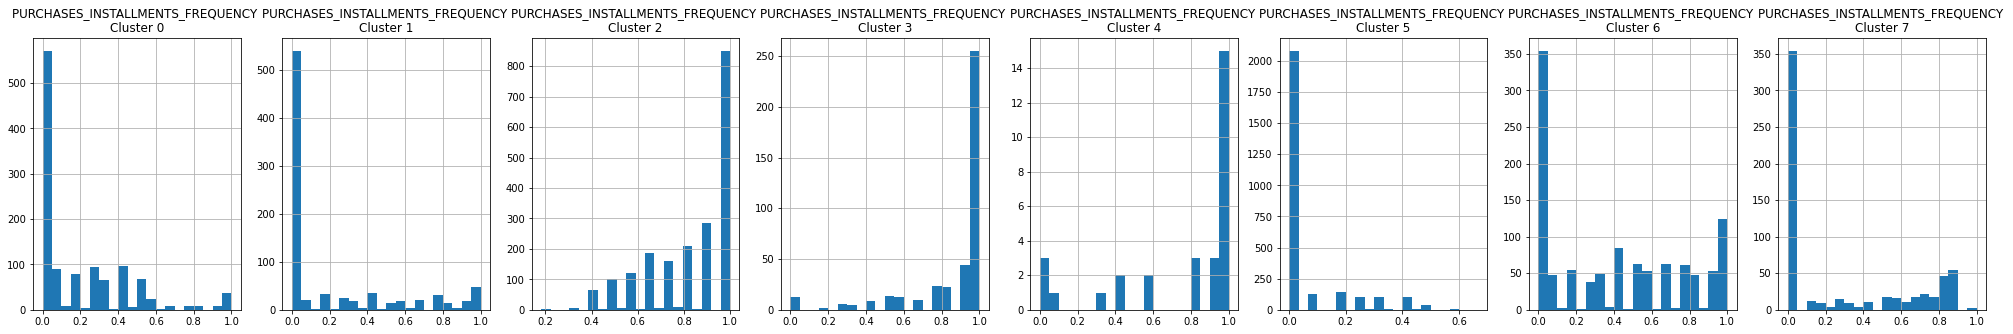

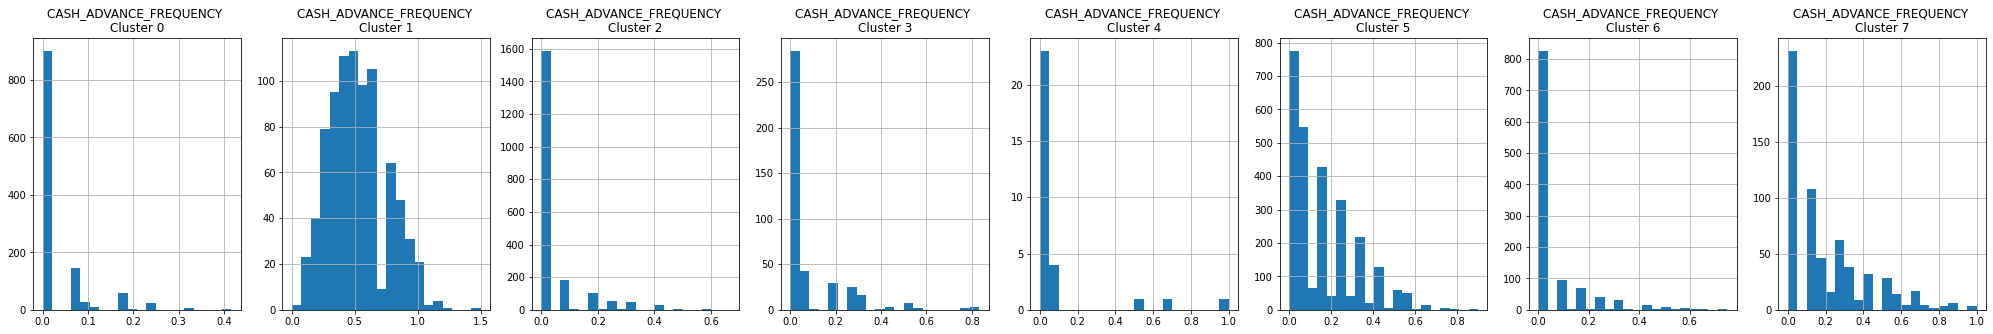

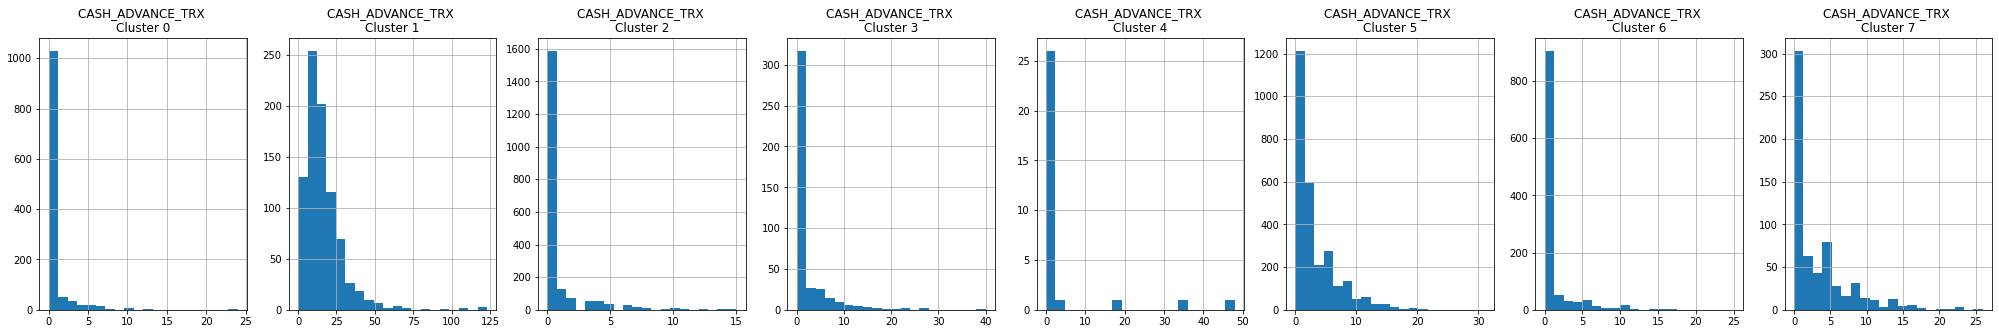

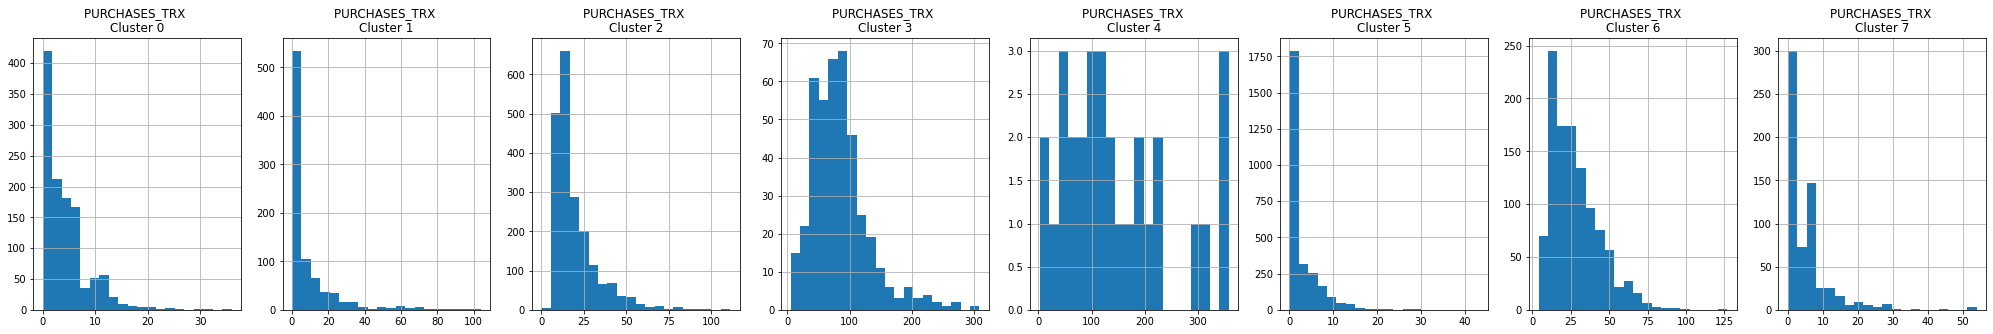

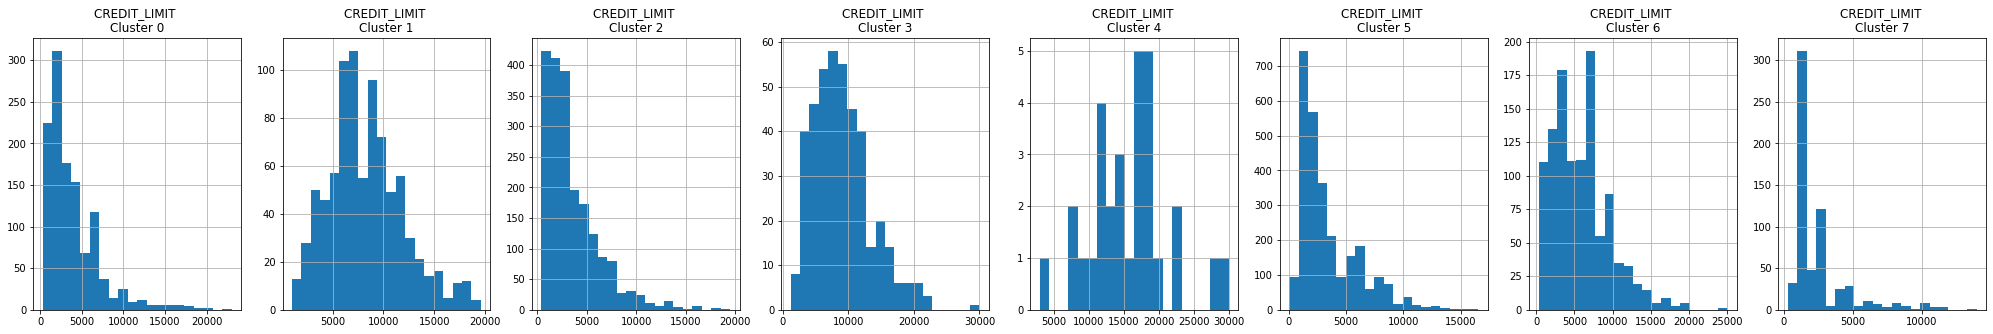

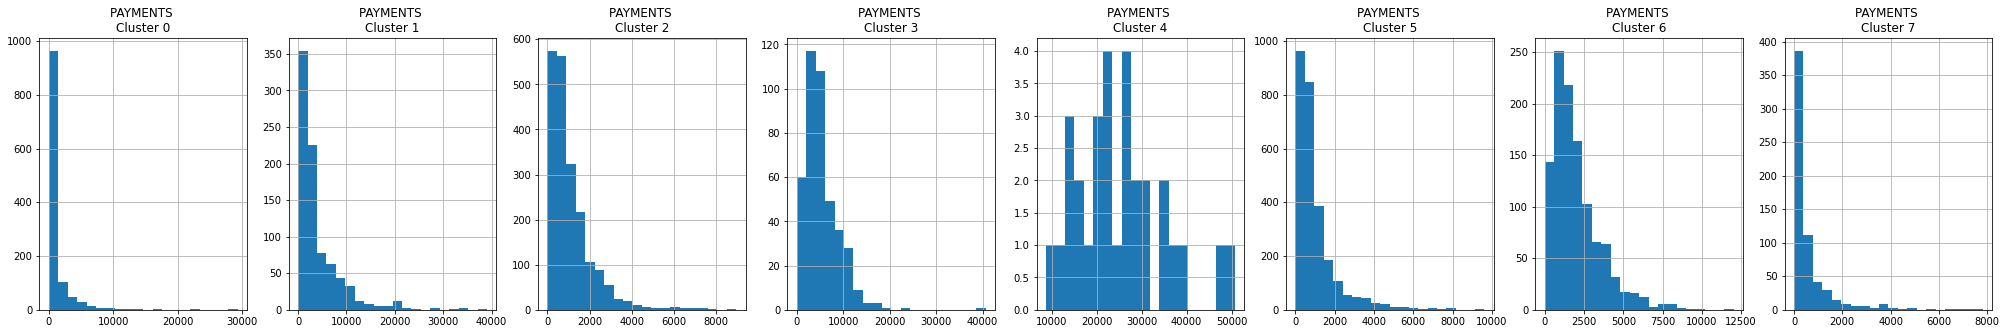

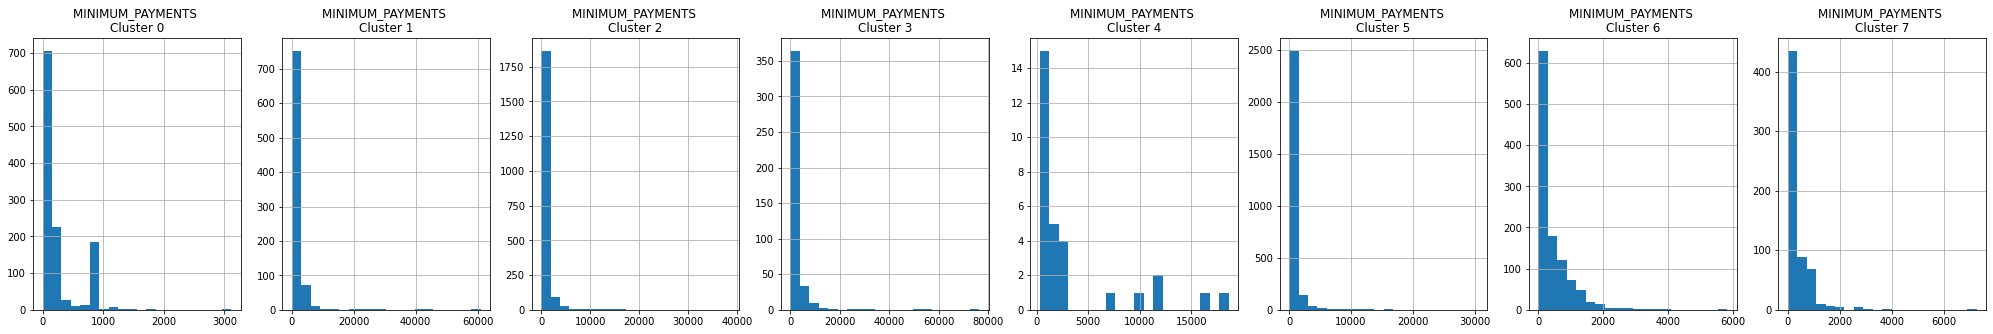

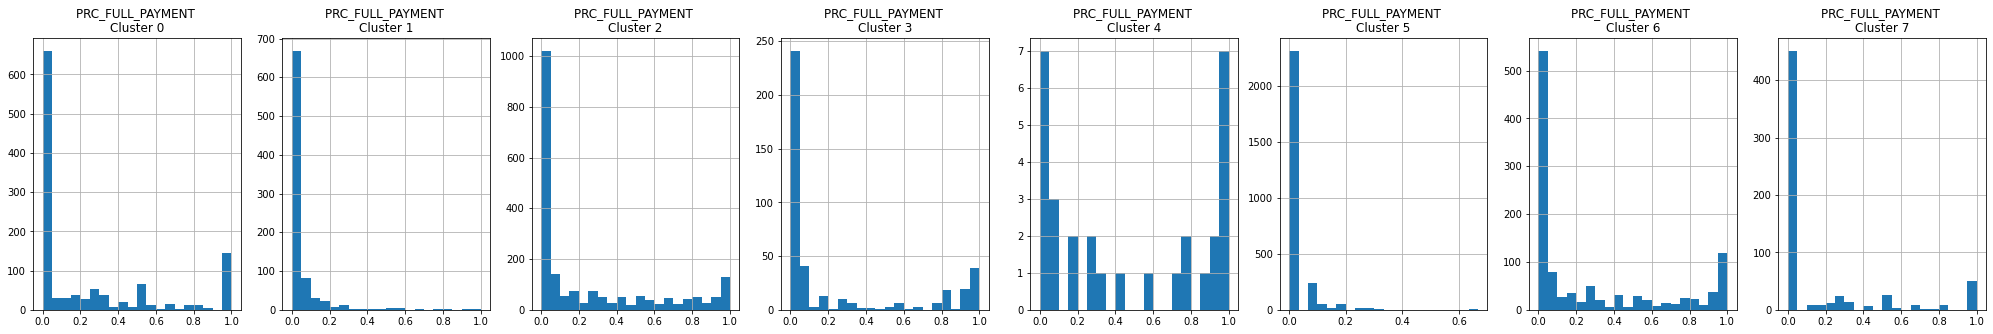

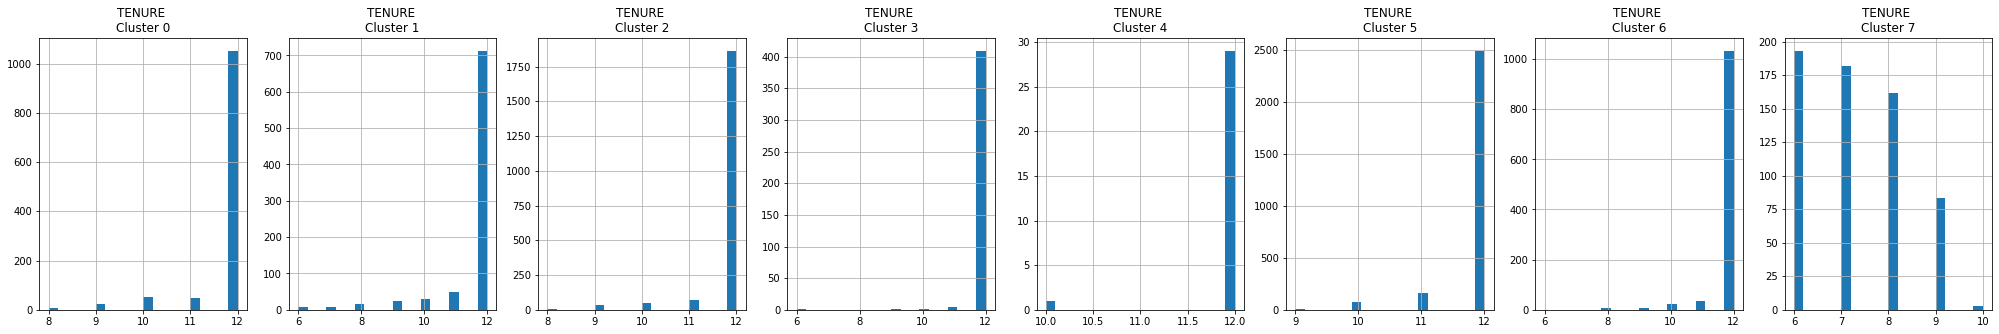

In [ ]:
# plot the histogram of various clusters

for i in creditcard_df.columns:
  plt.figure(figsize=(35,5))
  for j in range (8):
    plt.subplot(1,8, j+1)
    cluster = creditcard_df_cluster[creditcard_df_cluster['cluster']==j]
    cluster[i].hist(bins = 20)
    plt.title('{} \nCluster {}'.format(i,j))

  plt.show()

In [ ]:
# Obtain the principal components
pca=PCA(n_components=2)
principal_comp = pca.fit_transform(creditcard_df_scaled)
principal_comp

array([[-1.68222026, -1.07644685],
       [-1.13829077,  2.5065007 ],
       [ 0.96968546, -0.38350911],
       ...,
       [-0.92620592, -1.81079385],
       [-2.33655376, -0.6579764 ],
       [-0.55642169, -0.40047348]])

In [ ]:
pca_df = pd.DataFrame(data = principal_comp, columns =['pca1','pca2'])
pca_df.head()

,pca1,pca2
0,-1.682220,-1.076447
1,-1.138291,2.506501
2,0.969685,-0.383509
3,-0.873628,0.043165
4,-1.599434,-0.688576


In [ ]:
# concatenate the clusters labels to the DataFrame

pca_df = pd.concat([pca_df, pd.DataFrame({'cluster':labels})], axis=1)
pca_df.head()

,pca1,pca2,cluster
0,-1.682220,-1.076447,5
1,-1.138291,2.506501,1
2,0.969685,-0.383509,6
3,-0.873628,0.043165,5
4,-1.599434,-0.688576,5


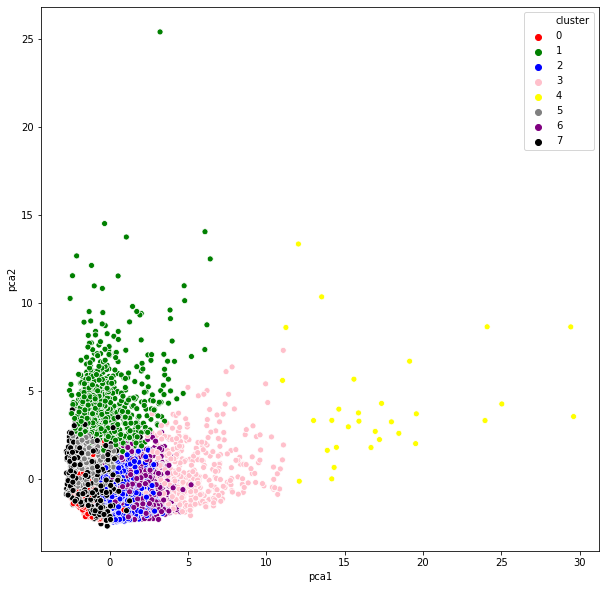

In [ ]:
plt.figure(figsize=(10,10))
ax= sns.scatterplot(x='pca1', y='pca2', hue='cluster', data=pca_df, palette = ['red','green','blue','pink','yellow','gray','purple','black'])

In [ ]:
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from keras.optimizers import SGD

In [ ]:
input_df = Input(shape = (17,))
x = Dense(7, activation = 'relu')(input_df)
x = Dense(500, activation = 'relu', kernel_initializer = 'glorot_uniform')(x)
x = Dense(500, activation = 'relu', kernel_initializer = 'glorot_uniform')(x)
x = Dense(2000, activation = 'relu', kernel_initializer = 'glorot_uniform')(x)

encoded = Dense(10, activation = 'relu', kernel_initializer = 'glorot_uniform')(x)

x = Dense(2000, activation = 'relu', kernel_initializer = 'glorot_uniform')(encoded)
x = Dense(500, activation = 'relu', kernel_initializer = 'glorot_uniform')(x)

decoded = Dense (17, kernel_initializer='glorot_uniform')(x)

#Auto Encoder

autoencoder = Model(input_df, decoded)

# Encoder
encoder=Model(input_df, encoded)

autoencoder.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
autoencoder.fit(creditcard_df_scaled, creditcard_df_scaled, batch_size = 128, epochs= 25, verbose = 1)

Epoch 1/25
70/70 [==============================] - 4s 53ms/step - loss: 0.5721
Epoch 2/25
70/70 [==============================] - 4s 53ms/step - loss: 0.2789
Epoch 3/25
70/70 [==============================] - 4s 53ms/step - loss: 0.2018
Epoch 4/25
70/70 [==============================] - 4s 53ms/step - loss: 0.1665
Epoch 5/25
70/70 [==============================] - 4s 53ms/step - loss: 0.1528
Epoch 6/25
70/70 [==============================] - 4s 53ms/step - loss: 0.1328
Epoch 7/25
70/70 [==============================] - 4s 53ms/step - loss: 0.1204
Epoch 8/25
70/70 [==============================] - 4s 52ms/step - loss: 0.1138
Epoch 9/25
70/70 [==============================] - 4s 53ms/step - loss: 0.1122
Epoch 10/25
70/70 [==============================] - 4s 53ms/step - loss: 0.1009
Epoch 11/25
70/70 [==============================] - 4s 53ms/step - loss: 0.0943
Epoch 12/25
70/70 [==============================] - 4s 53ms/step - loss: 0.0902
Epoch 13/25
70/70 [==================

In [ ]:
autoencoder.summary()

Model: "functional_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 17)]              0         
_________________________________________________________________
dense_29 (Dense)             (None, 7)                 126       
_________________________________________________________________
dense_30 (Dense)             (None, 500)               4000      
_________________________________________________________________
dense_31 (Dense)             (None, 500)               250500    
_________________________________________________________________
dense_32 (Dense)             (None, 2000)              1002000   
_________________________________________________________________
dense_33 (Dense)             (None, 10)                20010     
_________________________________________________________________
dense_34 (Dense)             (None, 2000)             

In [ ]:
pred = encoder.predict(creditcard_df_scaled)

In [ ]:
pred.shape

(8950, 10)

In [ ]:
pred

array([[0.28911287, 0.27543458, 0.        , ..., 0.5428608 , 0.0863844 ,
        0.7016566 ],
       [0.        , 0.8845515 , 0.        , ..., 1.0402676 , 2.0297034 ,
        0.3810121 ],
       [1.7213899 , 0.13675289, 0.        , ..., 0.24190962, 0.6888768 ,
        0.        ],
       ...,
       [3.0472531 , 3.6963563 , 0.        , ..., 1.2086284 , 0.        ,
        2.3060925 ],
       [1.6567833 , 2.8675048 , 0.        , ..., 1.3035144 , 0.03969153,
        0.66736007],
       [3.0716863 , 4.1192894 , 0.        , ..., 1.4392275 , 0.4651856 ,
        0.9473804 ]], dtype=float32)

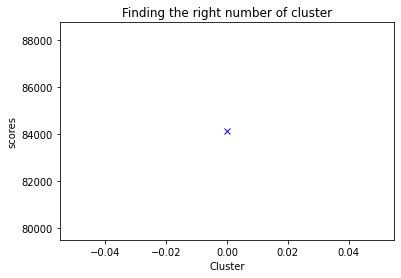

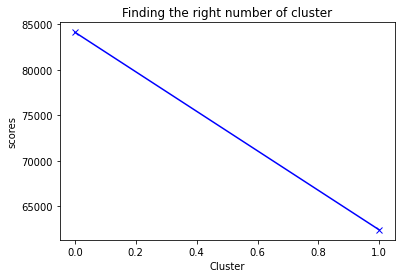

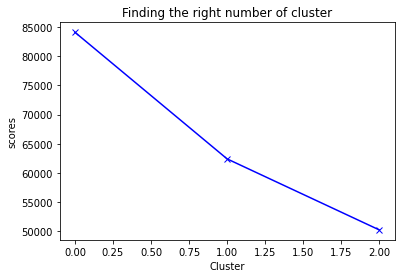

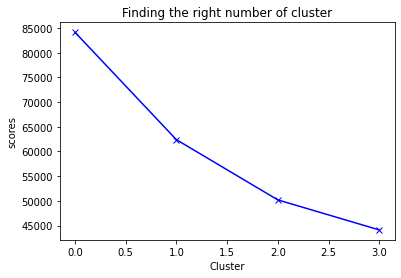

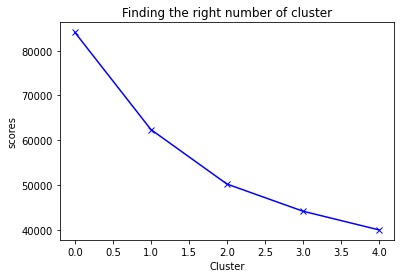

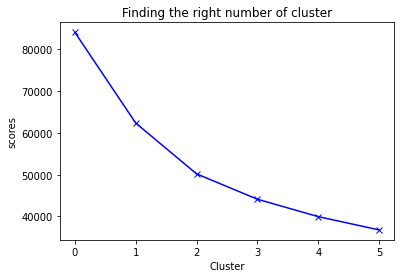

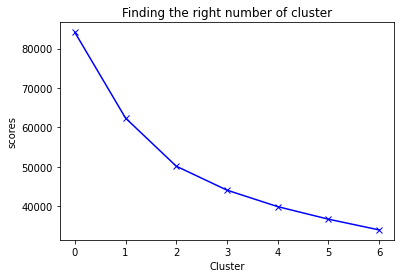

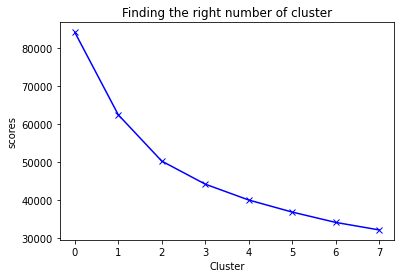

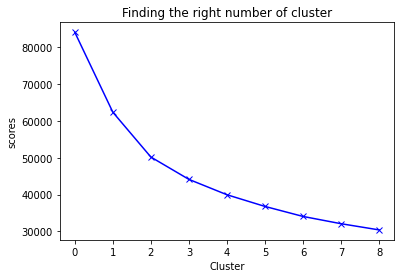

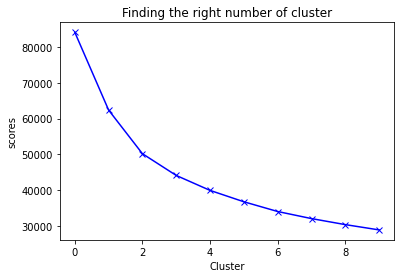

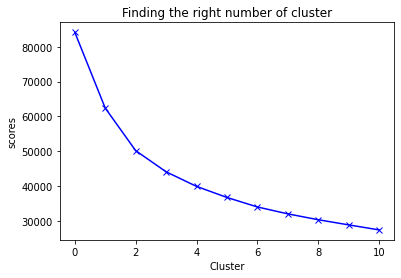

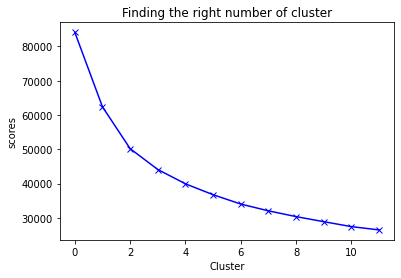

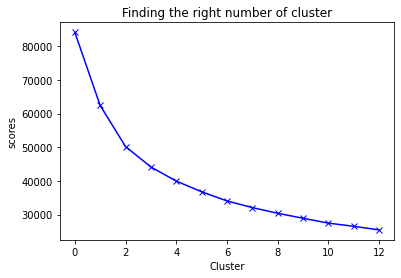

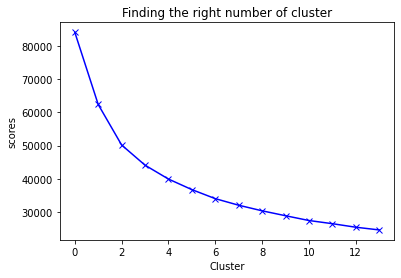

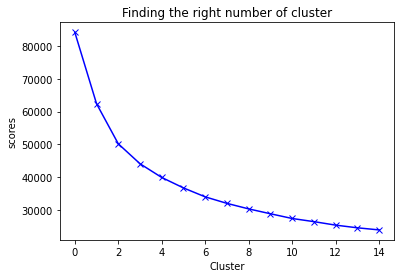

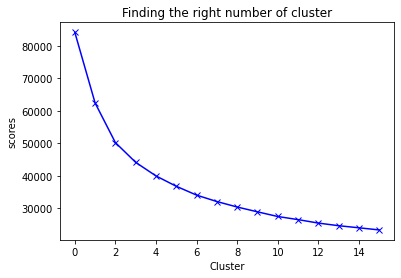

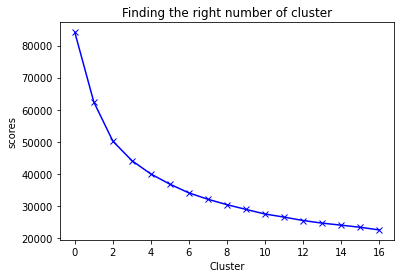

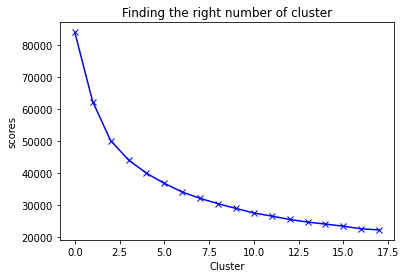

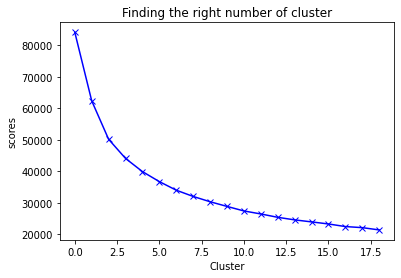

In [ ]:
# optimal number of clusters
scores_2 = []
range_values = range(1,20)

for i in range_values:
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(pred)
  scores_2.append(kmeans.inertia_)

  plt.plot(scores_2, 'bx-')
  plt.title('Finding the right number of cluster')
  plt.xlabel('Cluster')
  plt.ylabel('scores')
  plt.show()




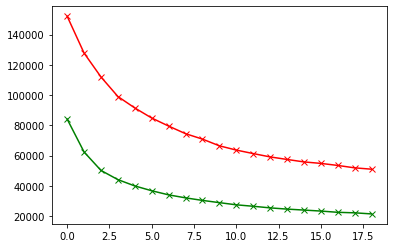

In [ ]:
plt.plot(scores_1, 'bx-', color='r')
plt.plot(scores_2, 'bx-', color='g')

In [ ]:
kmeans = KMeans(4)
kmeans.fit(pred)
labels = kmeans.labels_

In [ ]:
df_cluster_dr = pd.concat([creditcard_df, pd.DataFrame({'cluster':labels})], axis=1)
df_cluster_dr.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,2
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,2
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,2
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,2


In [ ]:
pca = PCA(n_components=2)
prin_comp = pca.fit_transform(pred)
pca_df = pd.DataFrame(data=prin_comp, columns = ['pca1','pca2'])

In [ ]:
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster':labels})], axis=1)
pca_df.head()

,pca1,pca2,cluster
0,-1.968771,-0.303818,2
1,-0.953293,1.325036,2
2,-0.935948,-0.732351,2
3,-0.840102,0.041576,2
4,-2.150680,-0.268417,2


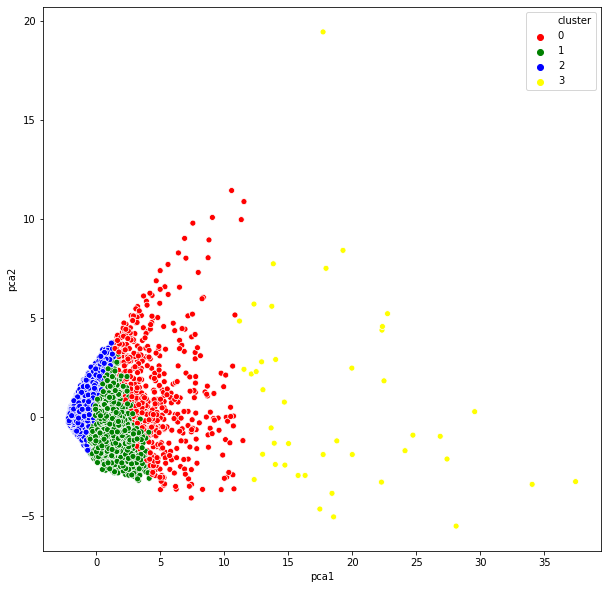

In [ ]:
plt.figure(figsize=(10,10))
ax=sns.scatterplot(x='pca1', y='pca2', hue = 'cluster',data=pca_df, palette=['red','green','blue','yellow'])